Загрузим необходимые библиотеки

In [11]:
!pip install tf-keras-vis

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16 as Model

Bзображения из датасета ImageNet

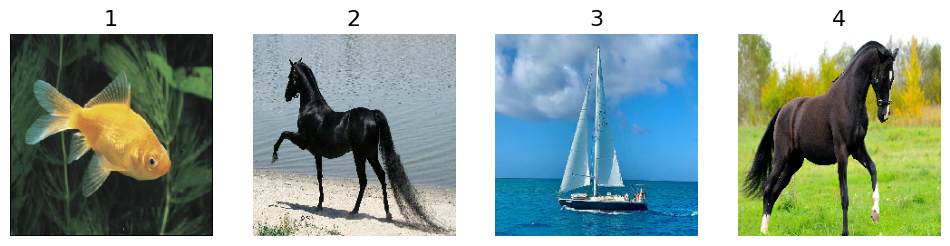

In [13]:
model = Model(weights='imagenet', include_top=True)

img1 = load_img('1.JPEG', target_size=(224, 224))
img2 = load_img('2.jpg', target_size=(224, 224))
img3 = load_img('3.jpg', target_size=(224, 224))
img4 = load_img('4.jpg', target_size=(224, 224))

# Преобразуем в массив NumPy и нормализуем
imagesArr = np.asarray([np.array(img1), np.array(img2), np.array(img3), np.array(img4)])
X = preprocess_input(imagesArr)

imagesTitles = ['1', '2', '3', '4'] # Список заголовков изображений
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(imagesTitles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imagesArr[i])
    ax[i].axis('off')

Карты значимости методом Saliency

In [14]:
# Создаем экземпляр класса ReplaceToLinear
replace2linear = ReplaceToLinear()

# Определяем функцию модификации модели
def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear

# Создаем объект CategoricalScore с заданными индексами классов
score = CategoricalScore([857, 330, 784, 900])
def score_function(output):
    return (output[0][857], output[1][330], output[2][784], output[3][900])

saliency = Saliency(model, model_modifier=replace2linear, clone=True)
mapList = saliency(score, X)

for i, title in enumerate(imagesTitles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(mapList[i], cmap='jet')  # Выводим с помощью цветовой карты jet чтобы понять какие части вносят больший вклад в принятие решения
    ax[i].axis('off')

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_92
Received: inputs=['Tensor(shape=(4, 224, 224, 3))']
  warnings.warn(msg)


Карты значимости с использованием параметров сглаживания SmoothGrad

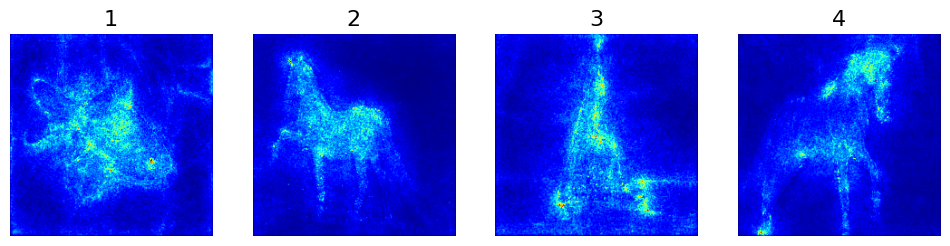

In [15]:
mapList = saliency(score, X, smooth_samples=20, smooth_noise=0.20)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(imagesTitles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(mapList[i], cmap='jet')
    ax[i].axis('off')

Построение карт значимости классов с помощью метода gradCAM

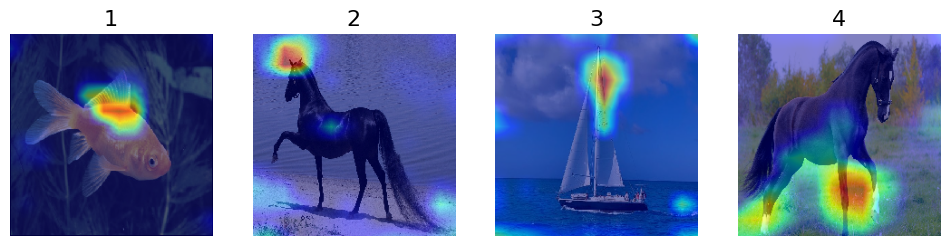

In [16]:
gradcam = Gradcam(model, model_modifier=replace2linear, clone=True)
mapList = gradcam(score, X, penultimate_layer=-1)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(imagesTitles):
    mapList2 = np.uint8(cm.jet(mapList[i])[..., :4] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imagesArr[i])  # Оригинальное изображение
    ax[i].imshow(mapList2, cmap='jet', alpha=0.5)  # Карта с прозрачностью
    ax[i].axis('off')

Построение карт значимости классов с помощью улучшенного метода gradCAM++

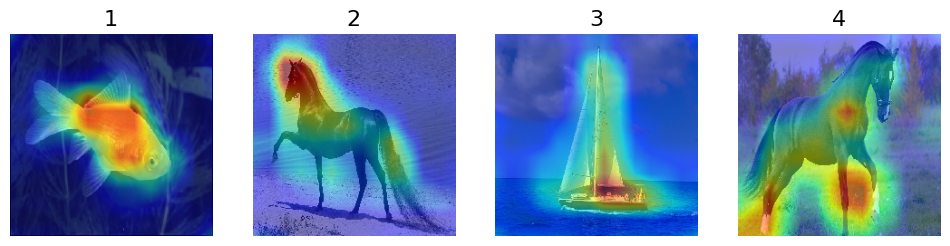

In [17]:
gradcam = GradcamPlusPlus(model, model_modifier=replace2linear, clone=True)
mapList = gradcam(score, X, penultimate_layer=-1)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(imagesTitles):
    mapList2 = np.uint8(cm.jet(mapList[i])[..., :4] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imagesArr[i])
    ax[i].imshow(mapList2, cmap='jet', alpha=0.5)
    ax[i].axis('off')